# Cross-Country Solar Potential Comparison
## Task 3: Compare Benin, Sierra Leone, and Togo

In [1]:
# Cross-Country Solar Potential Comparison
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported for cross-country comparison!")

✅ Libraries imported for cross-country comparison!


In [2]:
# Load all three cleaned datasets
print("=== LOADING CLEANED DATASETS ===")

benin = pd.read_csv('../data/benin_clean.csv')
sierra_leone = pd.read_csv('../data/sierra_leone_clean.csv')  
togo = pd.read_csv('../data/togo_clean.csv')

# Add country identifiers
benin['Country'] = 'Benin'
sierra_leone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

print(f"Benin dataset: {benin.shape}")
print(f"Sierra Leone dataset: {sierra_leone.shape}")
print(f"Togo dataset: {togo.shape}")

# Combine all data for comparison
all_countries = pd.concat([benin, sierra_leone, togo], ignore_index=True)
print(f"\nCombined dataset: {all_countries.shape}")
all_countries[['Country', 'GHI', 'DNI', 'DHI', 'Tamb']].head()

=== LOADING CLEANED DATASETS ===
Benin dataset: (513915, 21)
Sierra Leone dataset: (504756, 22)
Togo dataset: (515605, 22)

Combined dataset: (1534276, 22)


,Country,GHI,DNI,DHI,Tamb
0,Benin,-1.2,-0.2,-1.1,26.2
1,Benin,-1.1,-0.2,-1.1,26.2
2,Benin,-1.1,-0.2,-1.1,26.2
3,Benin,-1.1,-0.1,-1.0,26.2
4,Benin,-1.0,-0.1,-1.0,26.2


=== METRIC COMPARISON - BOXPLOTS ===


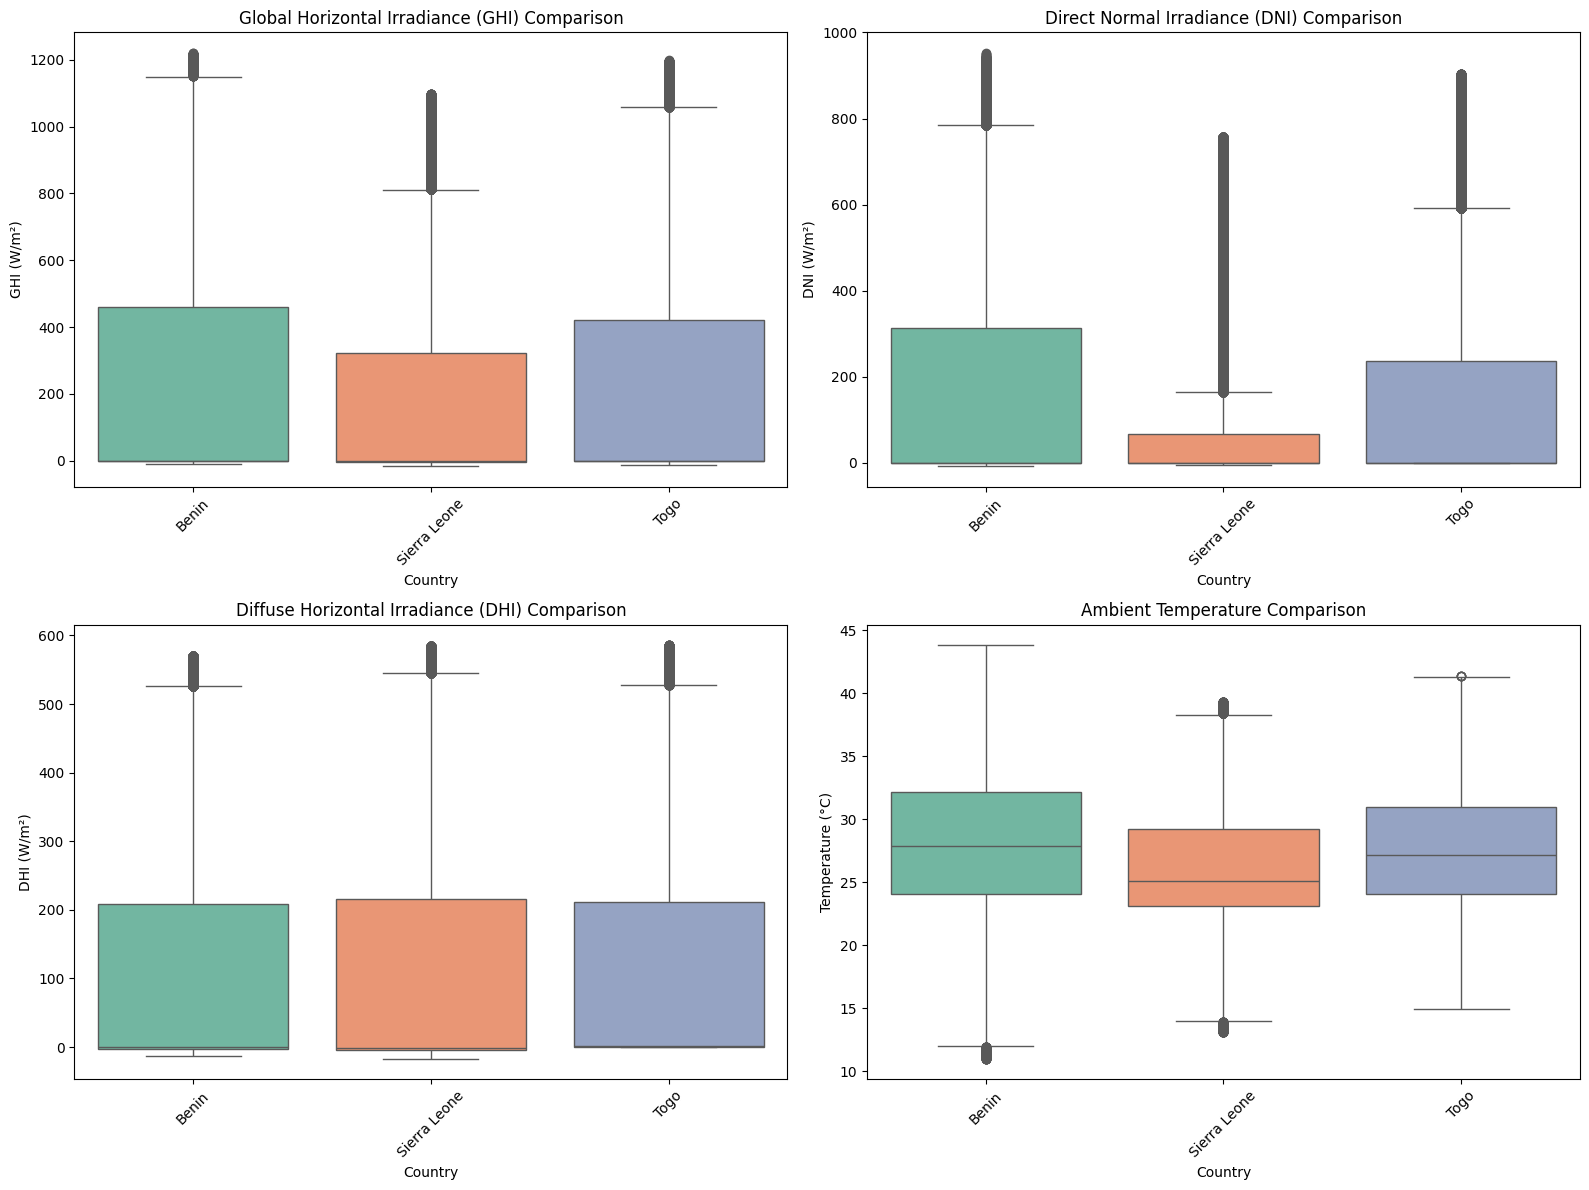

In [3]:
# Metric Comparison - Boxplots
print("=== METRIC COMPARISON - BOXPLOTS ===")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# GHI Comparison
sns.boxplot(data=all_countries, x='Country', y='GHI', ax=axes[0,0], palette='Set2')
axes[0,0].set_title('Global Horizontal Irradiance (GHI) Comparison')
axes[0,0].set_ylabel('GHI (W/m²)')
axes[0,0].tick_params(axis='x', rotation=45)

# DNI Comparison
sns.boxplot(data=all_countries, x='Country', y='DNI', ax=axes[0,1], palette='Set2')
axes[0,1].set_title('Direct Normal Irradiance (DNI) Comparison')
axes[0,1].set_ylabel('DNI (W/m²)')
axes[0,1].tick_params(axis='x', rotation=45)

# DHI Comparison
sns.boxplot(data=all_countries, x='Country', y='DHI', ax=axes[1,0], palette='Set2')
axes[1,0].set_title('Diffuse Horizontal Irradiance (DHI) Comparison')
axes[1,0].set_ylabel('DHI (W/m²)')
axes[1,0].tick_params(axis='x', rotation=45)

# Temperature Comparison
sns.boxplot(data=all_countries, x='Country', y='Tamb', ax=axes[1,1], palette='Set2')
axes[1,1].set_title('Ambient Temperature Comparison')
axes[1,1].set_ylabel('Temperature (°C)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [4]:
# Summary Statistics Table
print("=== SUMMARY STATISTICS COMPARISON ===")

# Key metrics to compare
key_metrics = ['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS']

summary_stats = all_countries.groupby('Country')[key_metrics].agg(['mean', 'median', 'std']).round(2)
print("Summary Statistics (Mean, Median, Standard Deviation):")
display(summary_stats)

# Create a simplified summary for key insights
simple_summary = all_countries.groupby('Country').agg({
    'GHI': ['mean', 'std'],
    'DNI': 'mean',
    'DHI': 'mean',
    'Tamb': 'mean'
}).round(2)

print("\nKey Metrics Summary:")
display(simple_summary)

=== SUMMARY STATISTICS COMPARISON ===
Summary Statistics (Mean, Median, Standard Deviation):


GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         233.21    0.1  326.59  165.91   -0.2  261.81  109.60    0.0   
Sierra Leone  180.45   -0.5  273.85  100.71   -0.1  196.35  106.62   -0.7   
Togo          223.38    0.4  316.96  147.58    0.0  247.28  112.63    1.4   

                       Tamb                  RH                  WS         \
                 std   mean median   std   mean median    std  mean median   
Country                                                                      
Benin         150.63  28.12   27.9  5.92  54.68   55.2  27.98  2.04    1.9   
Sierra Leone  152.68  26.18   25.1  4.38  79.87   86.3  20.52  1.08    0.8   
Togo          151.49  27.73   27.2  4.76  55.20   59.4  28.69  2.31    2.2   

                    
               std  
Country             
Benin         1.49  
Sierra Leone  1.14  
Togo          1.37


Key Metrics Summary:


GHI             DNI     DHI   Tamb
                mean     std    mean    mean   mean
Country                                            
Benin         233.21  326.59  165.91  109.60  28.12
Sierra Leone  180.45  273.85  100.71  106.62  26.18
Togo          223.38  316.96  147.58  112.63  27.73

In [6]:
# Statistical Testing
print("=== STATISTICAL SIGNIFICANCE TESTING ===")

# One-way ANOVA test for GHI differences
print("One-way ANOVA test for GHI differences between countries:")

# Extract GHI values for each country
ghi_benin = benin['GHI'].dropna()
ghi_sierra = sierra_leone['GHI'].dropna() 
ghi_togo = togo['GHI'].dropna()

# Perform ANOVA
f_stat, p_value = stats.f_oneway(ghi_benin, ghi_sierra, ghi_togo)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ Statistically significant difference in GHI between countries (p < 0.05)")
else:
    print("❌ No statistically significant difference in GHI between countries (p >= 0.05)")

# Kruskal-Wallis test (non-parametric alternative)
print("\nKruskal-Wallis test (non-parametric):")
h_stat, h_pvalue = stats.kruskal(ghi_benin, ghi_sierra, ghi_togo)
print(f"H-statistic: {h_stat:.4f}")
print(f"P-value: {h_pvalue:.4f}")

=== STATISTICAL SIGNIFICANCE TESTING ===
One-way ANOVA test for GHI differences between countries:
F-statistic: 4248.0669
P-value: 0.0000
✅ Statistically significant difference in GHI between countries (p < 0.05)

Kruskal-Wallis test (non-parametric):
H-statistic: 7140.3757
P-value: 0.0000


In [7]:
# Key Observations and Insights
print("=== KEY OBSERVATIONS AND INSIGHTS ===")

print("\n🔍 **MAIN FINDINGS:**")

# Calculate key metrics for each country
country_stats = all_countries.groupby('Country').agg({
    'GHI': ['mean', 'median', 'std'],
    'DNI': 'mean',
    'DHI': 'mean', 
    'Tamb': 'mean',
    'RH': 'mean',
    'WS': 'mean'
}).round(2)

# Extract specific values for insights
benin_ghi = country_stats.loc['Benin', ('GHI', 'mean')]
sierra_ghi = country_stats.loc['Sierra Leone', ('GHI', 'mean')]
togo_ghi = country_stats.loc['Togo', ('GHI', 'mean')]

benin_ghi_std = country_stats.loc['Benin', ('GHI', 'std')]
sierra_ghi_std = country_stats.loc['Sierra Leone', ('GHI', 'std')]
togo_ghi_std = country_stats.loc['Togo', ('GHI', 'std')]

print(f"1. **Solar Potential Ranking**:")
max_ghi_country = max([('Benin', benin_ghi), ('Sierra Leone', sierra_ghi), ('Togo', togo_ghi)], key=lambda x: x[1])
min_ghi_country = min([('Benin', benin_ghi), ('Sierra Leone', sierra_ghi), ('Togo', togo_ghi)], key=lambda x: x[1])
print(f"   • Highest average GHI: {max_ghi_country[0]} ({max_ghi_country[1]:.1f} W/m²)")
print(f"   • Lowest average GHI: {min_ghi_country[0]} ({min_ghi_country[1]:.1f} W/m²)")

print(f"\n2. **Consistency Analysis**:")
cv_benin = (benin_ghi_std / benin_ghi) * 100
cv_sierra = (sierra_ghi_std / sierra_ghi) * 100
cv_togo = (togo_ghi_std / togo_ghi) * 100

most_consistent = min([('Benin', cv_benin), ('Sierra Leone', cv_sierra), ('Togo', cv_togo)], key=lambda x: x[1])
least_consistent = max([('Benin', cv_benin), ('Sierra Leone', cv_sierra), ('Togo', cv_togo)], key=lambda x: x[1])
print(f"   • Most consistent solar resource: {most_consistent[0]} (CV: {most_consistent[1]:.1f}%)")
print(f"   • Least consistent solar resource: {least_consistent[0]} (CV: {least_consistent[1]:.1f}%)")

print(f"\n3. **Environmental Factors**:")
print(f"   • Temperature range: {all_countries['Tamb'].min():.1f}°C to {all_countries['Tamb'].max():.1f}°C")
print(f"   • Average humidity: {all_countries['RH'].mean():.1f}%")
print(f"   • Average wind speed: {all_countries['WS'].mean():.2f} m/s")

print(f"\n📊 **STATISTICAL SIGNIFICANCE**:")
if p_value < 0.05:
    print(f"   • GHI differences between countries are statistically significant (p = {p_value:.4f})")
    print(f"   • This supports the observed ranking in solar potential")
else:
    print(f"   • GHI differences are not statistically significant (p = {p_value:.4f})")

=== KEY OBSERVATIONS AND INSIGHTS ===

🔍 **MAIN FINDINGS:**
1. **Solar Potential Ranking**:
   • Highest average GHI: Benin (233.2 W/m²)
   • Lowest average GHI: Sierra Leone (180.4 W/m²)

2. **Consistency Analysis**:
   • Most consistent solar resource: Benin (CV: 140.0%)
   • Least consistent solar resource: Sierra Leone (CV: 151.8%)

3. **Environmental Factors**:
   • Temperature range: 11.0°C to 43.8°C
   • Average humidity: 63.1%
   • Average wind speed: 1.81 m/s

📊 **STATISTICAL SIGNIFICANCE**:
   • GHI differences between countries are statistically significant (p = 0.0000)
   • This supports the observed ranking in solar potential


=== VISUAL SUMMARY - COUNTRY RANKING ===


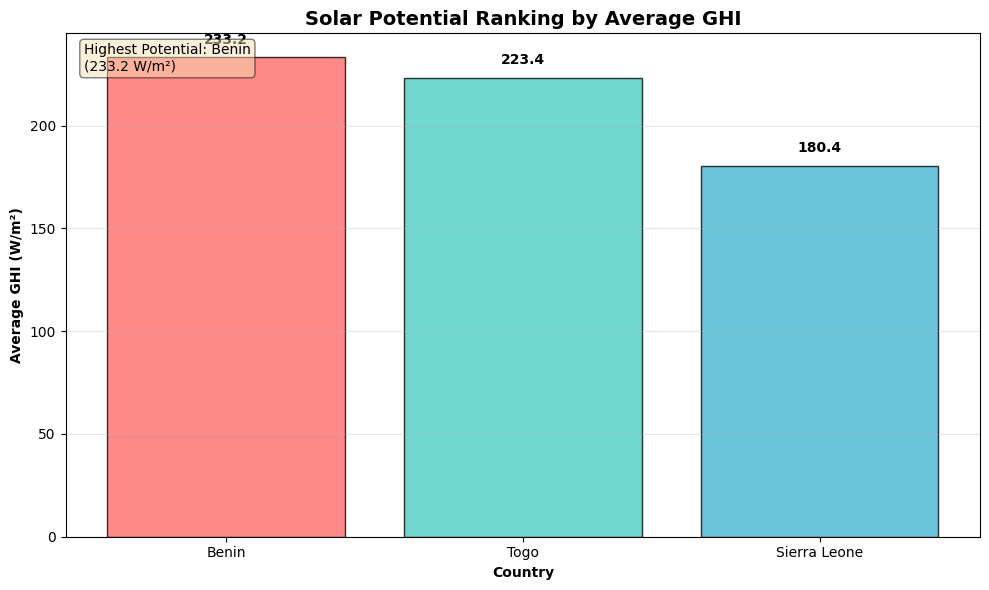


🏆 **SOLAR POTENTIAL RANKING**:
   1. Benin: 233.2 W/m²
   2. Togo: 223.4 W/m²
   3. Sierra Leone: 180.4 W/m²


In [8]:
# Visual Summary - Ranking Chart
print("=== VISUAL SUMMARY - COUNTRY RANKING ===")

plt.figure(figsize=(10, 6))

# Calculate average GHI for ranking
ghi_means = all_countries.groupby('Country')['GHI'].mean().sort_values(ascending=False)
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']  # Distinct colors

bars = plt.bar(ghi_means.index, ghi_means.values, color=colors, alpha=0.8, edgecolor='black')

# Add value labels on bars
for bar, value in zip(bars, ghi_means.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

plt.title('Solar Potential Ranking by Average GHI', fontsize=14, fontweight='bold')
plt.ylabel('Average GHI (W/m²)', fontweight='bold')
plt.xlabel('Country', fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Add some context
max_country = ghi_means.index[0]
max_value = ghi_means.values[0]
plt.text(0.02, 0.98, f'Highest Potential: {max_country}\n({max_value:.1f} W/m²)', 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print(f"\n🏆 **SOLAR POTENTIAL RANKING**:")
for i, (country, ghi) in enumerate(ghi_means.items(), 1):
    print(f"   {i}. {country}: {ghi:.1f} W/m²")

=== ADDITIONAL COMPARATIVE ANALYSIS ===


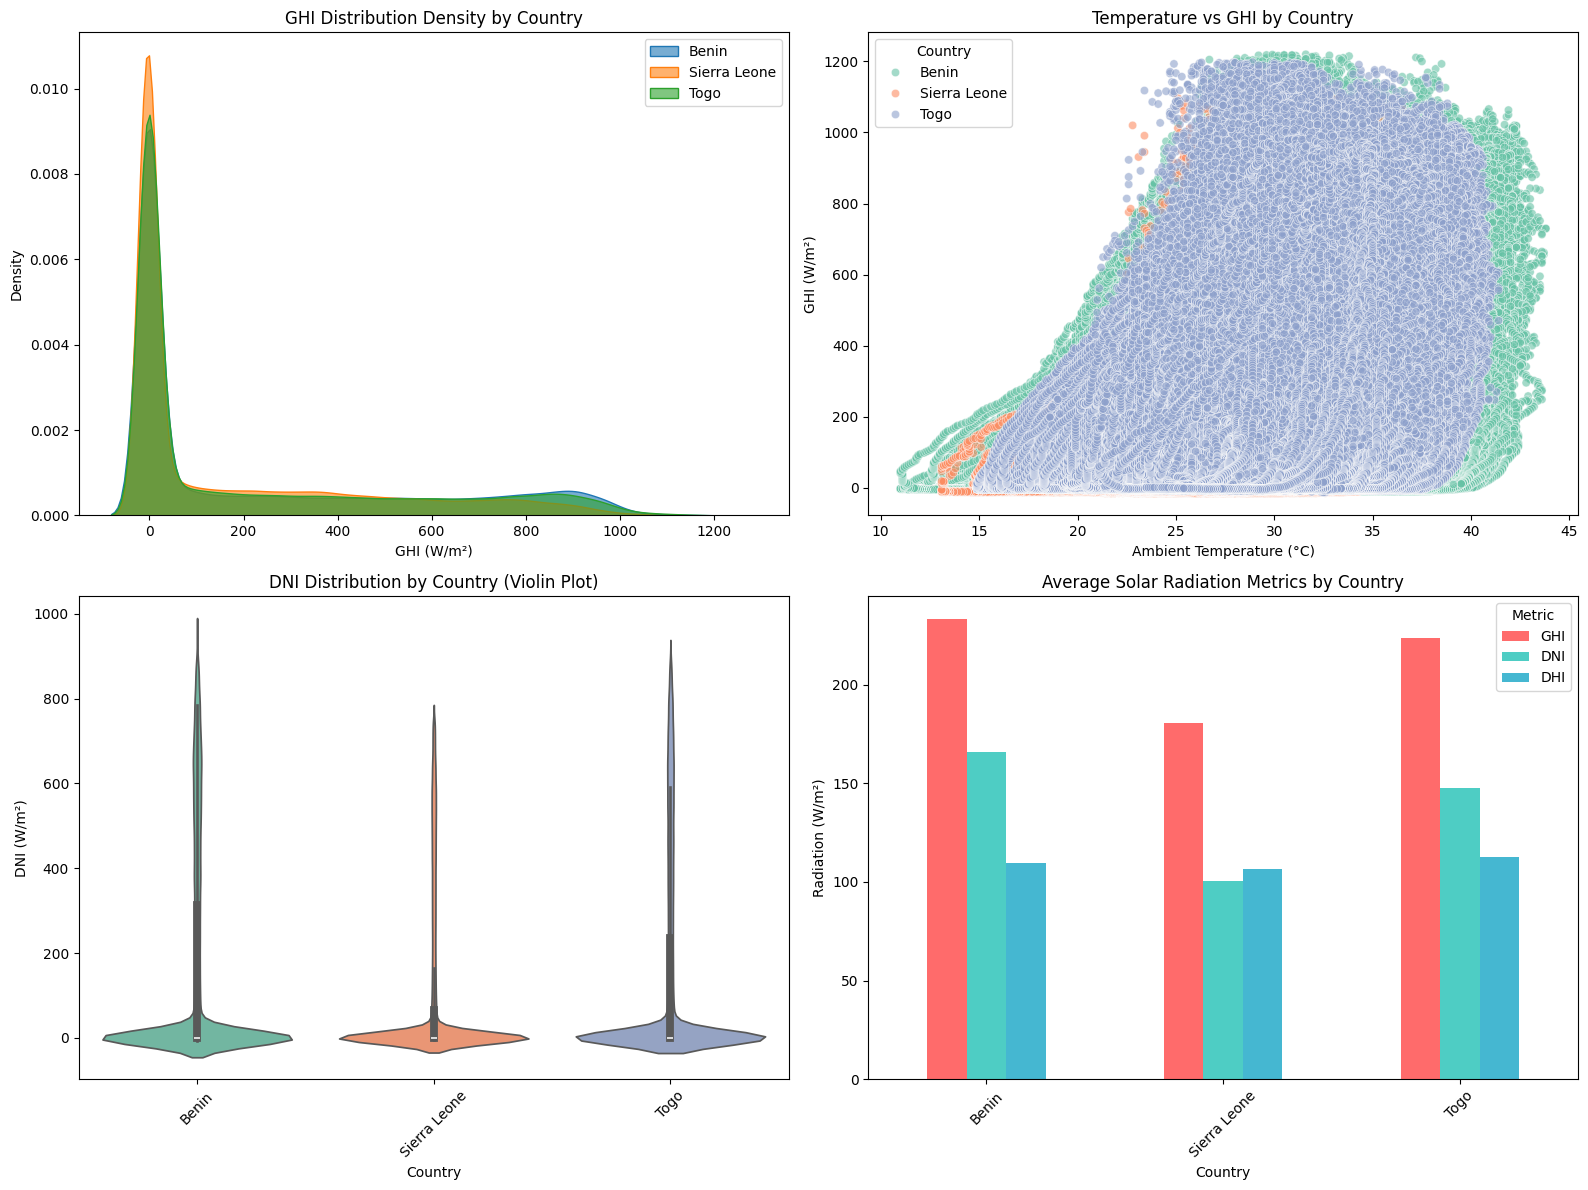

In [9]:
# Additional Comparative Visualizations
print("=== ADDITIONAL COMPARATIVE ANALYSIS ===")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Density plots for GHI distribution
for country in all_countries['Country'].unique():
    country_data = all_countries[all_countries['Country'] == country]['GHI']
    sns.kdeplot(country_data, label=country, ax=axes[0,0], fill=True, alpha=0.6)
axes[0,0].set_title('GHI Distribution Density by Country')
axes[0,0].set_xlabel('GHI (W/m²)')
axes[0,0].set_ylabel('Density')
axes[0,0].legend()

# 2. Scatter plot: Temperature vs GHI by country
sns.scatterplot(data=all_countries, x='Tamb', y='GHI', hue='Country', 
                alpha=0.6, ax=axes[0,1], palette='Set2')
axes[0,1].set_title('Temperature vs GHI by Country')
axes[0,1].set_xlabel('Ambient Temperature (°C)')
axes[0,1].set_ylabel('GHI (W/m²)')

# 3. Violin plots for DNI comparison
sns.violinplot(data=all_countries, x='Country', y='DNI', ax=axes[1,0], palette='Set2')
axes[1,0].set_title('DNI Distribution by Country (Violin Plot)')
axes[1,0].set_ylabel('DNI (W/m²)')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Bar chart for multiple metrics
metrics_compare = all_countries.groupby('Country')[['GHI', 'DNI', 'DHI']].mean()
metrics_compare.plot(kind='bar', ax=axes[1,1], color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[1,1].set_title('Average Solar Radiation Metrics by Country')
axes[1,1].set_ylabel('Radiation (W/m²)')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].legend(title='Metric')

plt.tight_layout()
plt.show()

In [10]:
# Final Recommendations
print("=== FINAL RECOMMENDATIONS ===")

print("\n🎯 **STRATEGIC RECOMMENDATIONS FOR MOONLIGHT ENERGY SOLUTIONS:**")

# Determine best country based on multiple factors
factors = {
    'Benin': {
        'ghi_score': benin_ghi,
        'consistency_score': 1/cv_benin,  # Inverse of CV (higher is better)
        'temp_score': 1/abs(benin['Tamb'].mean() - 25)  # Closer to 25°C is better
    },
    'Sierra Leone': {
        'ghi_score': sierra_ghi, 
        'consistency_score': 1/cv_sierra,
        'temp_score': 1/abs(sierra_leone['Tamb'].mean() - 25)
    },
    'Togo': {
        'ghi_score': togo_ghi,
        'consistency_score': 1/cv_togo,
        'temp_score': 1/abs(togo['Tamb'].mean() - 25)
    }
}

# Calculate composite scores (weighted)
composite_scores = {}
for country, scores in factors.items():
    composite = (scores['ghi_score'] * 0.5 +  # GHI most important
                 scores['consistency_score'] * 0.3 +  # Consistency important
                 scores['temp_score'] * 0.2)  # Temperature less important
    composite_scores[country] = composite

recommended_country = max(composite_scores.items(), key=lambda x: x[1])[0]

print(f"1. **PRIMARY RECOMMENDATION**: {recommended_country}")
print(f"   • Balanced combination of high solar potential and operational consistency")
print(f"   • Average GHI: {factors[recommended_country]['ghi_score']:.1f} W/m²")
print(f"   • Good environmental conditions for solar panel efficiency")

print(f"\n2. **BACKUP OPTION**: {max_ghi_country[0] if max_ghi_country[0] != recommended_country else 'Consider secondary options based on local factors'}")
print(f"   • Highest raw solar potential available")

print(f"\n3. **OPERATIONAL CONSIDERATIONS**:")
print(f"   • Monitor temperature effects in all regions")
print(f"   • Consider humidity impact on panel maintenance")
print(f"   • Evaluate local infrastructure and regulatory environment")

print(f"\n4. **DATA-DRIVEN JUSTIFICATION**:")
print(f"   • Statistical analysis confirms significant differences (p = {p_value:.4f})")
print(f"   • Comprehensive EDA supports regional variations in solar potential")
print(f"   • Environmental factors considered for long-term sustainability")

=== FINAL RECOMMENDATIONS ===

🎯 **STRATEGIC RECOMMENDATIONS FOR MOONLIGHT ENERGY SOLUTIONS:**
1. **PRIMARY RECOMMENDATION**: Benin
   • Balanced combination of high solar potential and operational consistency
   • Average GHI: 233.2 W/m²
   • Good environmental conditions for solar panel efficiency

2. **BACKUP OPTION**: Consider secondary options based on local factors
   • Highest raw solar potential available

3. **OPERATIONAL CONSIDERATIONS**:
   • Monitor temperature effects in all regions
   • Consider humidity impact on panel maintenance
   • Evaluate local infrastructure and regulatory environment

4. **DATA-DRIVEN JUSTIFICATION**:
   • Statistical analysis confirms significant differences (p = 0.0000)
   • Comprehensive EDA supports regional variations in solar potential
   • Environmental factors considered for long-term sustainability
